<a href="https://colab.research.google.com/github/tirumanagirisivasai/Deep-Learning-lab-Programs/blob/main/Experiment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from warnings import filterwarnings #ignore warnings from specified module
filterwarnings("ignore")

In [24]:
dataset = pd.read_csv('/content/drive/MyDrive/dl_lab_datasets/car_purchasing.csv',encoding='ISO-8859-1')
dataset.head()

,customer name,JobTitle,customer e-mail,country,gender,age,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,credit card debt,net worth,car purchase amount
0,Martina Avila,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,42,167411.18,0.00,400184.25,NaN,567595.43,567595.43,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,CAPTAIN III (POLICE DEPARTMENT),eu.dolor@diam.co.uk,Belize,0,41,155966.02,245131.88,137811.38,NaN,538909.28,538909.28,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,CAPTAIN III (POLICE DEPARTMENT),vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43,212739.13,106088.18,16452.60,NaN,335279.91,335279.91,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,WIRE ROPE CABLE MAINTENANCE MECHANIC,malesuada@dignissim.com,Cook Islands,1,58,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,14426.164850,548599.0524,67422.36313
4,Cedric Leach,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57,134401.60,9737.00,182234.59,NaN,326373.19,326373.19,5358.712177,560304.0671,55915.46248


In [25]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   JobTitle             500 non-null    object 
 2   customer e-mail      500 non-null    object 
 3   country              500 non-null    object 
 4   gender               500 non-null    int64  
 5   age                  500 non-null    int64  
 6   BasePay              500 non-null    float64
 7   OvertimePay          500 non-null    float64
 8   OtherPay             500 non-null    float64
 9   Benefits             0 non-null      float64
 10  TotalPay             500 non-null    float64
 11  TotalPayBenefits     500 non-null    float64
 12  credit card debt     500 non-null    float64
 13  net worth            500 non-null    float64
 14  car purchase amount  500 non-null    float64
dtypes: float64(9), int64(2), object(4)
memor

In [26]:
dataset.columns

Index(['customer name', 'JobTitle', 'customer e-mail', 'country', 'gender',
       'age', 'BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay',
       'TotalPayBenefits', 'credit card debt', 'net worth',
       'car purchase amount'],
      dtype='object')

In [27]:
#finding correlation between the target fearture and remaining features
dataset.corr()[["car purchase amount"]].sort_values(["car purchase amount"])

,car purchase amount
gender,-0.066408
OvertimePay,-0.031566
OtherPay,-0.008536
TotalPay,0.006014
TotalPayBenefits,0.006014
credit card debt,0.028882
BasePay,0.037602
net worth,0.488580
age,0.633273
car purchase amount,1.000000


In [28]:
dataset.isna().sum()

customer name            0
JobTitle                 0
customer e-mail          0
country                  0
gender                   0
age                      0
BasePay                  0
OvertimePay              0
OtherPay                 0
Benefits               500
TotalPay                 0
TotalPayBenefits         0
credit card debt         0
net worth                0
car purchase amount      0
dtype: int64

In [29]:
car_df = dataset.drop(["customer name","customer e-mail","country","JobTitle","Benefits"],axis=1)

In [30]:
#Define X and Y
Y = car_df[["car purchase amount"]]
X = car_df.drop(["car purchase amount"],axis=1)
print(X.shape,Y.shape)

(500, 9) (500, 1)


In [34]:
mms = MinMaxScaler()
X_scaled = mms.fit_transform(X)
Y_scaled = mms.fit_transform(Y.values).reshape(-1,1)

In [35]:
print(X_scaled.shape,Y_scaled.shape)

(500, 9) (500, 1)


In [36]:
xtrain,xtest,ytrain,ytest = train_test_split(X_scaled,Y_scaled,test_size=0.25,random_state=101)

In [37]:
print(xtrain.shape,ytrain.shape,xtest.shape,ytest.shape)

(375, 9) (375, 1) (125, 9) (125, 1)


In [92]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 20, input_dim=9, activation='relu'),
    tf.keras.layers.Dense(units = 20, activation='relu'),
    tf.keras.layers.Dense(units = 10, activation='relu'),
    tf.keras.layers.Dense(units = 1, activation='linear')
])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 20)                200       
                                                                 
 dense_21 (Dense)            (None, 20)                420       
                                                                 
 dense_22 (Dense)            (None, 10)                210       
                                                                 
 dense_23 (Dense)            (None, 1)                 11        
                                                                 
Total params: 841 (3.29 KB)
Trainable params: 841 (3.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [93]:
model.compile(optimizer='adam', loss="mean_squared_error", metrics=['mae'])

In [94]:
history = model.fit(xtrain, ytrain, batch_size=50, epochs=50, verbose=8,validation_split=0.1)

Epoch 1/50
Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50


In [83]:

ytest[10]

array([0.7118085])

In [78]:
d = xtest[10].reshape(1,-1)

In [79]:
d

array([[0.        , 0.7       , 0.29918506, 0.25708459, 0.04333739,
        0.00149975, 0.00149975, 0.34291994, 0.65802246]])

In [95]:
print(f'Predicted values = {model.predict(d)[0][0]} \n Actual Values:{ytest[10][0]}')

1/1 [==============================] - 0s 53ms/step
Predicted values = 0.7017443180084229 
 Actual Values:0.7118084967605633


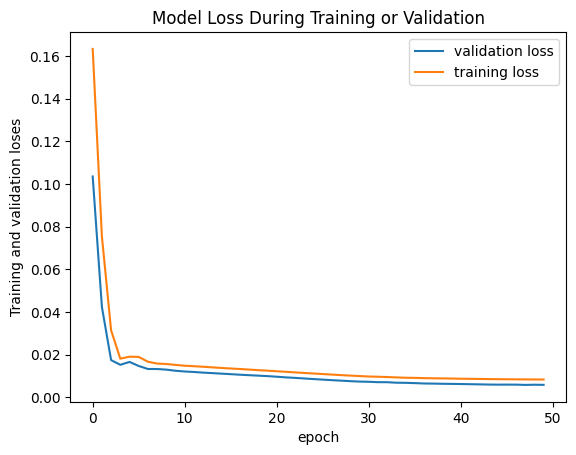

In [96]:
plt.plot(history.history['val_loss'], label='validation loss')
plt.plot(history.history['loss'], label='training loss')
plt.ylabel('Training and validation loses')
plt.xlabel('epoch')
plt.title('Model Loss During Training or Validation')
plt.legend()
plt.show()

In [97]:
total_predicted = model.predict(xtest)

4/4 [==============================] - 0s 4ms/step


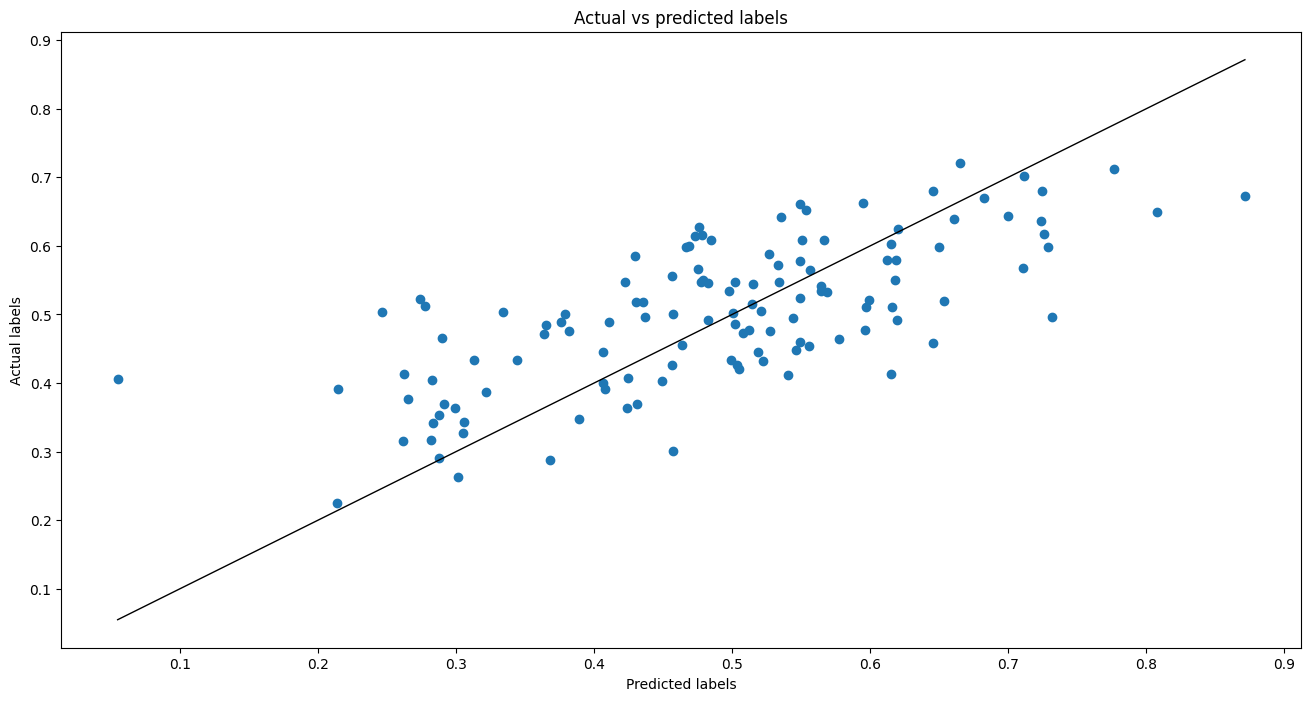

In [105]:
plt.figure(figsize=(16, 8))
plt.scatter(ytest,total_predicted)
plt.plot([ytest.min(),ytest.max()],[ytest.min(),ytest.max()],c='black',lw=1)
plt.xlabel("Predicted labels")
plt.ylabel('Actual labels')
plt.title("Actual vs predicted labels")
plt.show()